### Import Libraries

In [147]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mpl_toolkits
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, LabelEncoder, OrdinalEncoder, power_transform
from sklearn.compose import TransformedTargetRegressor
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, ElasticNetCV, LassoCV, BayesianRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
# from xgboost import XGBRegressor
%matplotlib inline

### Import/Read Files

In [112]:
train_house = pd.read_csv('/Users/fabianrichard/Documents/Predictive Analytics Project/train.csv')
test_house = pd.read_csv('/Users/fabianrichard/Documents/Predictive Analytics Project/test.csv')

### Display Data/Stats

In [116]:
train_house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [117]:
train_house.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [118]:
test_house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [119]:
test_house.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


### Price Distribution

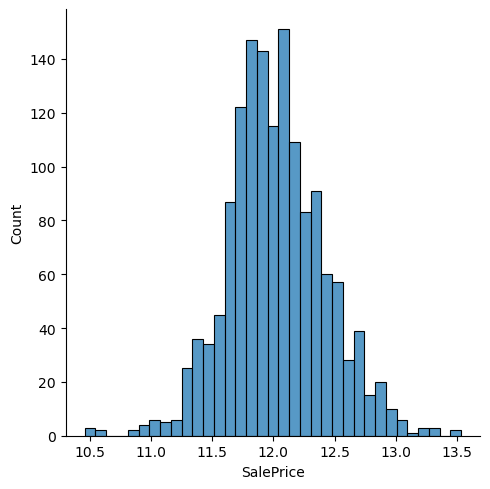

In [120]:
sns.displot(np.log(train_house['SalePrice']))

### Correlation Matrix

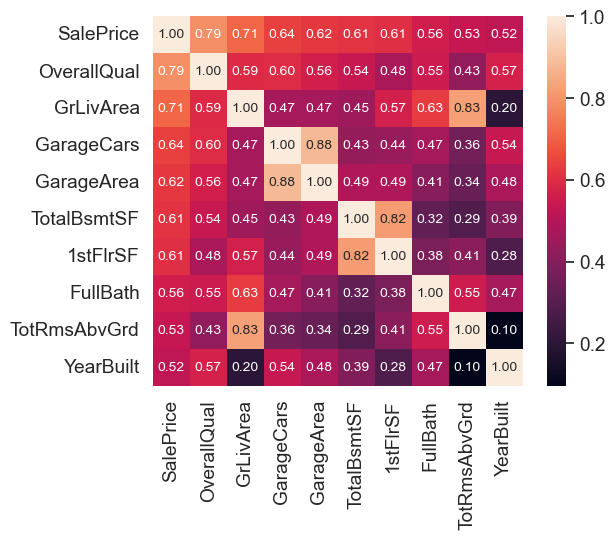

In [121]:
corr_matrix = train_house.corr()
cols = corr_matrix.nlargest(10, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train_house[cols].values.T)
sns.set(font_scale = 1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)

### Choose Most Influential Features

In [125]:
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']

### Plot all and look for outliers

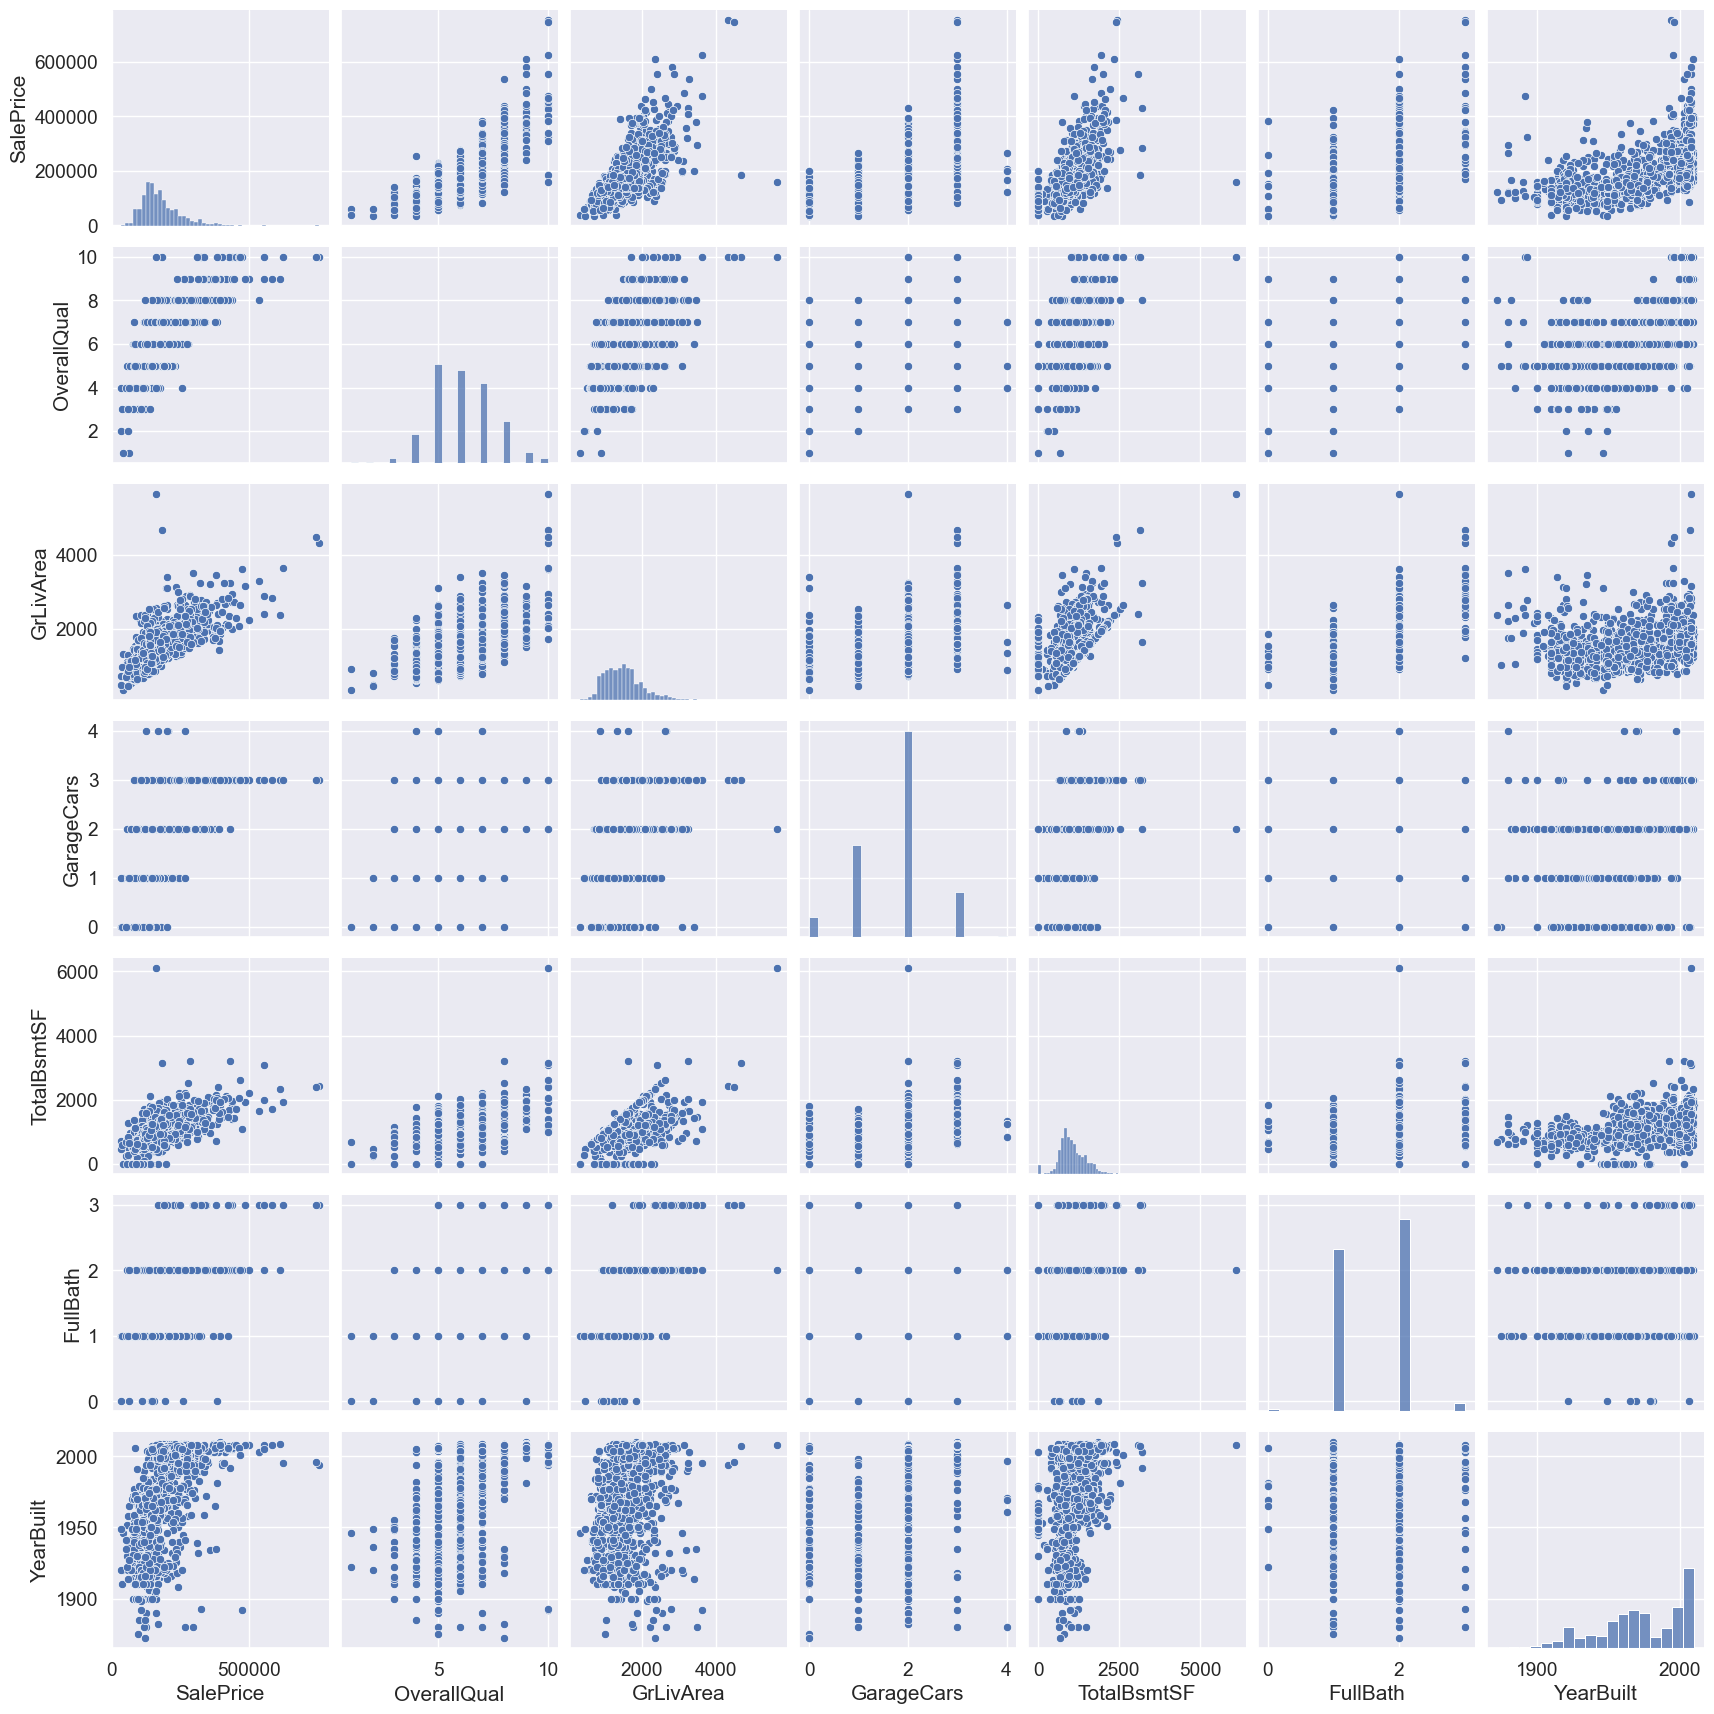

In [126]:
sns.pairplot(train_house[cols], height = 2.5)

### Remove Outliers in GrLivArea & TotalBsmtSF

In [128]:
train_house = train_house[train_house.GrLivArea < 4400]

### Identify train & test data; Look for null values

In [130]:
x_cols = cols.copy()
x_cols.remove('SalePrice')
x_train = train_house[x_cols]
x_test = test_house[x_cols]

### Replace null values w/ 0

In [131]:
x_test = pd.DataFrame(x_test).fillna(0)

### Define train target data

In [132]:
y_train = train_house['SalePrice']

### Scale Features

In [136]:
scaler = RobustScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

## Build Models
- Train each twice:
    1) Using original target
    2) Using target log

### Empty Dict for Model Comparison

In [141]:
model_comp = {}

### Linear Regression

In [142]:
LR_model = LinearRegression()
LR_scores = cross_val_score(LR_model, x_train, y_train, cv=5, scoring='neg_root_mean_squared_error')
LR_mean_score = LR_scores.mean()
LR_std_score = LR_scores.std()
print('RMSE =', LR_scores)
print('Mean RMSE =', LR_mean_score)
print('Std Dev RMSE =', LR_std_score)
model_comp['LR'] = [LR_mean_score, LR_std_score]

RMSE = [-31947.33780349 -31415.11966371 -39796.67814332 -33544.59745514
 -33413.18645353]
Mean RMSE = -34023.383903836366
Std Dev RMSE = 3001.516734070779


### Linear Regression w/ Log Target

In [149]:
LR_model_log = LinearRegression()
LR_log_target = TransformedTargetRegressor(regressor = LR_model_log, func=np.log, inverse_func=np.exp)
LR_scores_log = cross_val_score(LR_log_target, x_train, y_train, cv=5, scoring='neg_root_mean_squared_error')
LR_mean_score_log = LR_scores_log.mean()
LR_std_score_log = LR_scores_log.std()
print('RMSE =', LR_scores_log)
print('Mean RMSE =', LR_mean_score_log)
print('Std Dev RMSE =', LR_std_score_log)
model_comp['LR_log'] = [LR_mean_score_log, LR_std_score_log]

RMSE = [-28208.98886702 -27171.9000077  -29965.34778439 -27006.15215299
 -28359.09694708]
Mean RMSE = -28142.297151836137
Std Dev RMSE = 1059.0051577474526


### Decision Tree

In [148]:
DT_model = DecisionTreeRegressor(random_state=0)
DT_scores = cross_val_score(DT_model, x_train, y_train, cv=5, scoring='neg_root_mean_squared_error')
DT_mean_score = DT_scores.mean()
DT_std_score = DT_scores.std()
print('RMSE =', DT_scores)
print('Mean RMSE =', DT_mean_score)
print('Std Dev RMSE =', DT_std_score)
model_comp['DT'] = [DT_mean_score, DT_std_score]

RMSE = [-40154.84770552 -38695.64693833 -42235.13514262 -35498.0933545
 -40467.82993132]
Mean RMSE = -39410.31061445958
Std Dev RMSE = 2256.9228723856595


### Decision Tree w/ Log Target

In [150]:
DT_model_log = DecisionTreeRegressor(random_state=0)
DT_log_target = TransformedTargetRegressor(regressor=DT_model_log, func=np.log, inverse_func=np.exp)
DT_scores_log = cross_val_score(DT_log_target, x_train, y_train, cv=5, scoring='neg_root_mean_squared_error')
DT_mean_score_log = DT_scores_log.mean()
DT_std_score_log = DT_scores_log.std()
print('RMSE =', DT_scores_log)
print('Mean RMSE =', DT_mean_score_log)
print('Std Dev RMSE =', DT_std_score_log)
model_comp['DT_log'] = [DT_mean_score_log, DT_std_score_log]

RMSE = [-42756.10088271 -40600.53199938 -42060.59404631 -36907.2543197
 -40536.35796735]
Mean RMSE = -40572.167843092066
Std Dev RMSE = 2020.8242917410544


### Random Forest

In [151]:
RF_model = RandomForestRegressor(random_state=0)
RF_scores = cross_val_score(RF_model, x_train, y_train, cv=5, scoring='neg_root_mean_squared_error')
RF_mean_score = RF_scores.mean()
RF_std_score = RF_scores.std()
print('RMSE =', RF_scores)
print('Mean RMSE =', RF_mean_score)
print('Std Dev RMSE =', RF_std_score)
model_comp['RF'] = [RF_mean_score, RF_std_score]

RMSE = [-30793.02890785 -27886.73657523 -33730.90627634 -25181.71667026
 -30241.68165384]
Mean RMSE = -29566.814016703982
Std Dev RMSE = 2875.7765066440084


### Random Forest w/ Log Target

In [156]:
RF_model_log = RandomForestRegressor(random_state=0)
RF_log_target = TransformedTargetRegressor(regressor=RF_model_log, func=np.log, inverse_func=np.exp)
RF_scores_log = cross_val_score(RF_log_target, x_train, y_train, cv=5, scoring='neg_root_mean_squared_error')
RF_mean_score_log = RF_scores_log.mean()
RF_std_score_log = RF_scores_log.std()
print('RMSE =', RF_scores_log)
print('Mean RMSE =', RF_mean_score_log)
print('Std Dev RMSE =', RF_std_score_log)
model_comp['RF_log'] = [RF_mean_score_log, RF_std_score_log]

RMSE = [-31296.08888314 -28670.98748886 -35143.67613773 -24416.0411363
 -29482.89824017]
Mean RMSE = -29801.938377239894
Std Dev RMSE = 3497.2953448931817


### KNN

In [153]:
KN_model = KNeighborsRegressor()
KN_scores = cross_val_score(KN_model, x_train, y_train, cv=5, scoring='neg_root_mean_squared_error')
KN_mean_score = KN_scores.mean()
KN_std_score = KN_scores.std()
print('RMSE =', KN_scores)
print('Mean RMSE =', KN_mean_score)
print('Std Dev RMSE =', KN_std_score)
model_comp['KN'] = [KN_mean_score, KN_std_score]

RMSE = [-33439.48443033 -31533.68542887 -34314.85329827 -26731.84461435
 -29527.2645396 ]
Mean RMSE = -31109.42646228466
Std Dev RMSE = 2740.452013481621


### KNN w/ Log Target

In [158]:
KN_model_log = KNeighborsRegressor()
KN_log_target = TransformedTargetRegressor(regressor=KN_model_log, func=np.log, inverse_func=np.exp)
KN_scores_log = cross_val_score(KN_log_target, x_train, y_train, cv=5, scoring='neg_root_mean_squared_error')
KN_mean_score_log = KN_scores_log.mean()
KN_std_score_log = KN_scores_log.std()
print('RMSE =', KN_scores_log)
print('Mean RMSE =', KN_mean_score_log)
print('Std Dev RMSE =', KN_std_score_log)
model_comp['KN_log'] = [KN_mean_score_log, KN_std_score_log]

RMSE = [-33466.80849238 -31716.99488216 -35298.8007075  -26803.15295851
 -29717.3029816 ]
Mean RMSE = -31400.612004428956
Std Dev RMSE = 2950.772785634559


### Gradient Boosting

In [159]:
GBR_model = GradientBoostingRegressor(random_state=0)
GBR_scores = cross_val_score(GBR_model, x_train, y_train, cv=5, scoring='neg_root_mean_squared_error')
GBR_mean_score = GBR_scores.mean()
GBR_std_score = GBR_scores.std()
print('RMSE =', GBR_scores)
print('Mean RMSE =', GBR_mean_score)
print('Std Dev RMSE =', GBR_std_score)
model_comp['GBR'] = [GBR_mean_score, GBR_std_score]

RMSE = [-28595.58550174 -29724.87208649 -32273.12274835 -26037.33089882
 -29020.69482012]
Mean RMSE = -29130.321211102382
Std Dev RMSE = 2004.7564212301725


### Gradient Boosting w/ Log Target

In [160]:
GBR_model_log = GradientBoostingRegressor(random_state=0)
GBR_log_target = TransformedTargetRegressor(regressor=GBR_model_log, func=np.log, inverse_func=np.exp)
GBR_scores_log = cross_val_score(GBR_log_target, x_train, y_train, cv=5, scoring='neg_root_mean_squared_error')
GBR_mean_score_log = GBR_scores_log.mean()
GBR_std_score_log = GBR_scores_log.std()
print('RMSE =', GBR_scores_log)
print('Mean RMSE =', GBR_mean_score_log)
print('Std Dev RMSE =', GBR_std_score_log)
model_comp['GBR_log'] = [GBR_mean_score_log, GBR_std_score_log]

RMSE = [-30431.262502   -29124.24353574 -32415.02014557 -24606.12967959
 -27942.52609583]
Mean RMSE = -28903.836391748115
Std Dev RMSE = 2611.682279806051


### XGBoost

### XGBoost w/ Log Target

### SVR

In [161]:
SVR_model = SVR()
SVR_scores = cross_val_score(SVR_model, x_train, y_train, cv=5, scoring='neg_root_mean_squared_error')
SVR_mean_score = SVR_scores.mean()
SVR_std_score = SVR_scores.std()
print('RMSE =', SVR_scores)
print('Mean RMSE =', SVR_mean_score)
print('Std Dev RMSE =', SVR_std_score)
model_comp['SVR'] = [SVR_mean_score, SVR_std_score]

RMSE = [-76879.30487639 -83391.19166318 -89551.61037674 -71782.80688006
 -77025.23955679]
Mean RMSE = -79726.03067063204
Std Dev RMSE = 6139.517020704571


### SVR w/ Log Target

In [163]:
SVR_model_log = SVR()
SVR_log_target = TransformedTargetRegressor(regressor=SVR_model_log, func=np.log, inverse_func=np.exp)
SVR_scores_log = cross_val_score(SVR_log_target, x_train, y_train, cv=5, scoring='neg_root_mean_squared_error')
SVR_mean_score_log = SVR_scores_log.mean()
SVR_std_score_log = SVR_scores_log.std()
print('RMSE =', SVR_scores_log)
print('Mean RMSE =', SVR_mean_score_log)
print('Std Dev RMSE =', SVR_std_score_log)
model_comp['SVR_log'] = [SVR_mean_score_log, SVR_std_score_log]

RMSE = [-31143.47945888 -34997.27011255 -38178.46838038 -26112.62542774
 -28085.0385437 ]
Mean RMSE = -31703.376384649833
Std Dev RMSE = 4414.496614671673


### Compare RMSE's

In [165]:
model_comp = pd.DataFrame.from_dict(model_comp).T
model_comp.columns = ['RMSE', 'Std Dev RMSE']
model_comp = model_comp.sort_values('RMSE', ascending=False)
model_comp.style.background_gradient(cmap='Greens')

,RMSE,Std Dev RMSE
LR_log,-28142.297152,1059.005158
GBR_log,-28903.836392,2611.682280
GBR,-29130.321211,2004.756421
RF,-29566.814017,2875.776507
RF_Log,-29801.938377,3497.295345
RF_log,-29801.938377,3497.295345
KN,-31109.426462,2740.452013
KN_log,-31400.612004,2950.772786
SVR_log,-31703.376385,4414.496615
LR,-34023.383904,3001.516734


In [166]:
LR_model_log.fit(x_train, np.log(y_train))
test_pred = np.exp(LR_model_log.predict(x_test))
pred = pd.concat([test['Id'], pd.Series(test_pred, name='SalePrice')], axis=1)
pred['Id'] = pred['Id'].astype('int')

KeyError: 'Id'

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

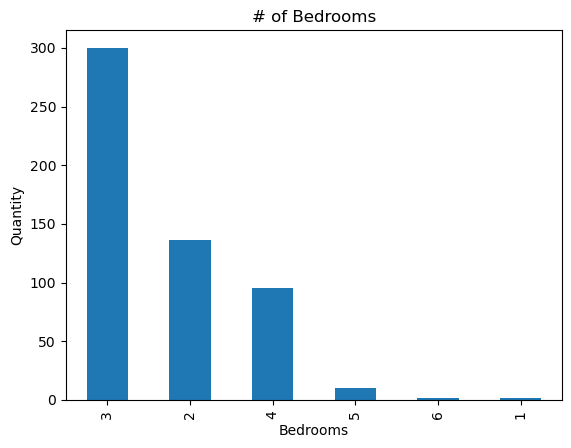

In [89]:
house_data['bedrooms'].value_counts().plot(kind='bar')
plt.title('# of Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Quantity')
sns.despine

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

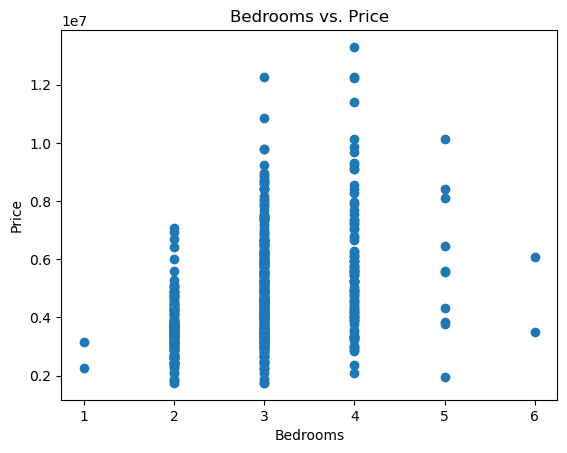

In [90]:
plt.scatter(house_data.bedrooms, house_data.price)
plt.title('Bedrooms vs. Price')
plt.xlabel('Bedrooms')
plt.ylabel('Price')
sns.despine

Text(0, 0.5, 'Sqft')

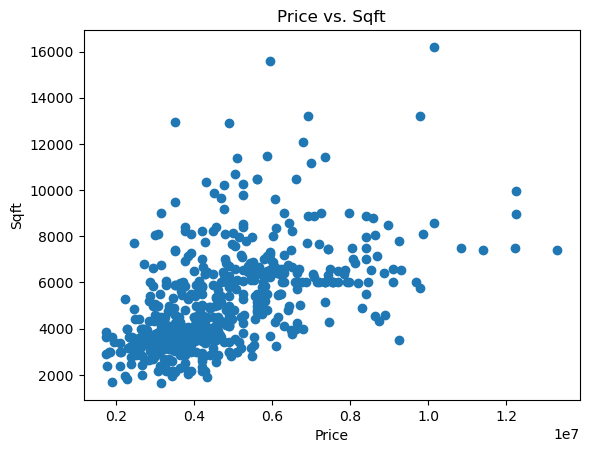

In [91]:
plt.scatter(house_data.price, house_data.area)
plt.title('Price vs. Sqft')
plt.xlabel('Price')
plt.ylabel('Sqft')